In [1]:
import pickle
import numpy as np
import re
from sklearn import linear_model
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import ensemble 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
# 

import os

In [2]:
train=pd.read_csv('train.csv',parse_dates=['datetime'])#方便提取时间特征
test=pd.read_csv('test.csv',parse_dates=['datetime'])

train=train.drop(['casual','registered'],axis=1)
train.head()
#os.chdir()修改当前工作目录



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [3]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [4]:
def rmsle(y_log, y0_log):
    return np.sqrt(np.mean(np.square(y_log - y0_log)))
'''1.RMSLE 惩罚欠预测大于过预测，适用于某些需要欠预测损失更大的场景，如预测共享单车需求
   2.如果预测的值的范围很大，RMSE 会被一些大的值主导。RMSE 一般对于固定的平均分布的预测值才合理。'''

'1.RMSLE 惩罚欠预测大于过预测，适用于某些需要欠预测损失更大的场景，如预测共享单车需求\n   2.如果预测的值的范围很大，RMSE 会被一些大的值主导。RMSE 一般对于固定的平均分布的预测值才合理。'

In [5]:
#去除极端值
train = train[np.abs(train['count']-train['count'].mean())<=(3*train['count'].std())]

  


In [6]:
for df in (train,test):
    
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hr'] = df['datetime'].dt.hour

    df['hr_categori'] = np.nan
    df.loc[(df.workingday == 1)&(df.hr <= 9)&(df.hr >= 7), 'hr_categori'] = "rush"
    df.loc[(df.workingday == 1)&(df.hr <= 19)&(df.hr >= 16), 'hr_categori'] = "rush"
    df.loc[(df.workingday == 1)&(df.hr < 16)&(df.hr > 9), 'hr_categori'] = "day"
    df.loc[(df.workingday == 1)&(df.hr < 7)|(df.hr > 19), 'hr_categori'] = "night"

D:\Users\Surface\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Users\Surface\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


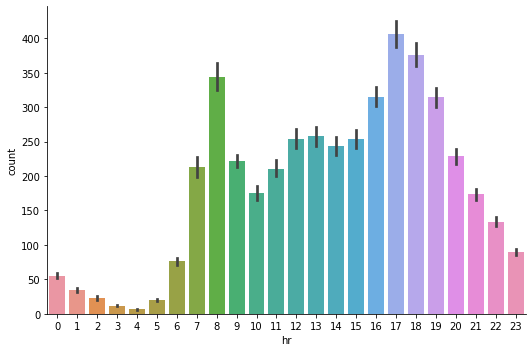

In [7]:
sns.factorplot(x="hr",y="count",data=train,kind='bar',size=5,aspect=1.5)#https://www.cnblogs.com/jin-liang/p/9011771.html  factorplot参数

In [8]:
for df in (train,test):
    
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hr'] = df['datetime'].dt.hour

    df['hr_categori'] = np.nan
    df.loc[(df.workingday == 1)&(df.hr <= 9)&(df.hr >= 7), 'hr_categori'] = "rush"
    df.loc[(df.workingday == 1)&(df.hr <= 19)&(df.hr >= 16), 'hr_categori'] = "rush"
    df.loc[(df.workingday == 1)&(df.hr < 16)&(df.hr > 9), 'hr_categori'] = "day"
    df.loc[(df.workingday == 1)&(df.hr < 7)|(df.hr > 19), 'hr_categori'] = "night"

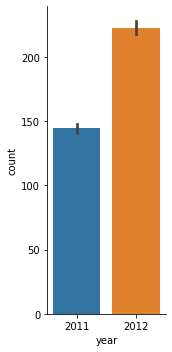

In [9]:
sns.factorplot(x="year",y="count",data=train,kind='bar',size=5,aspect=0.5)

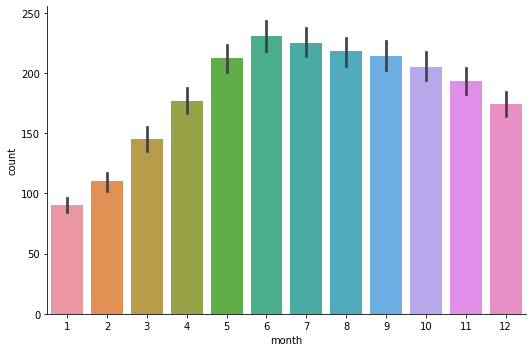

In [10]:
sns.factorplot(x="month",y="count",data=train,kind='bar',size=5,aspect=1.5)

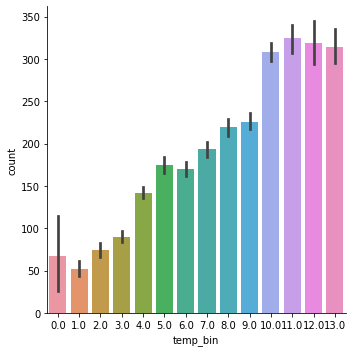

In [11]:
new_df=train.copy()
new_df['temp_bin']=np.floor(new_df['temp'])//3     #   /表示留余数//表示不留余数  np.foor向下取整
new_df['temp_bin']
sns.factorplot(x="temp_bin",y="count",data=new_df,kind='bar')

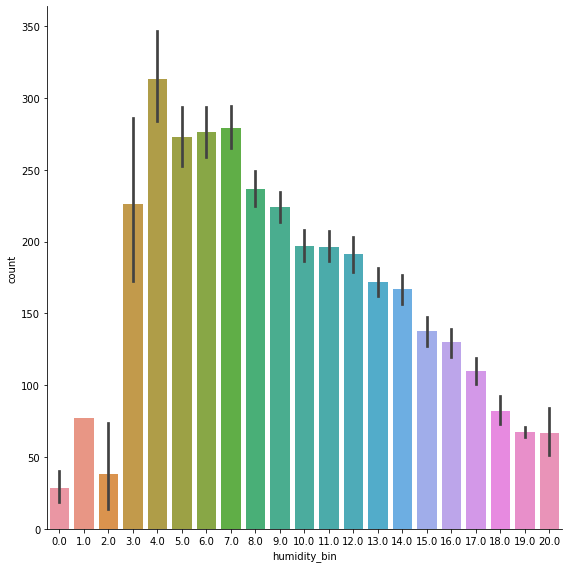

In [12]:
new_df=train.copy()

new_df['humidity_bin']=np.floor(new_df['humidity'])//5

sns.factorplot(x="humidity_bin",y="count",data=new_df,kind='bar',size=8)

In [13]:
for df in (train,test):
    
    df['humi_categori'] = np.nan
    df.loc[df.humidity < 15, 'humi_categori'] = 'low'
    df.loc[(df.humidity <= 85)&(df.humidity >= 15), 'humi_categori'] = 'normal'
    df.loc[(df.humidity >= 85), 'humi_categori'] = 'high'


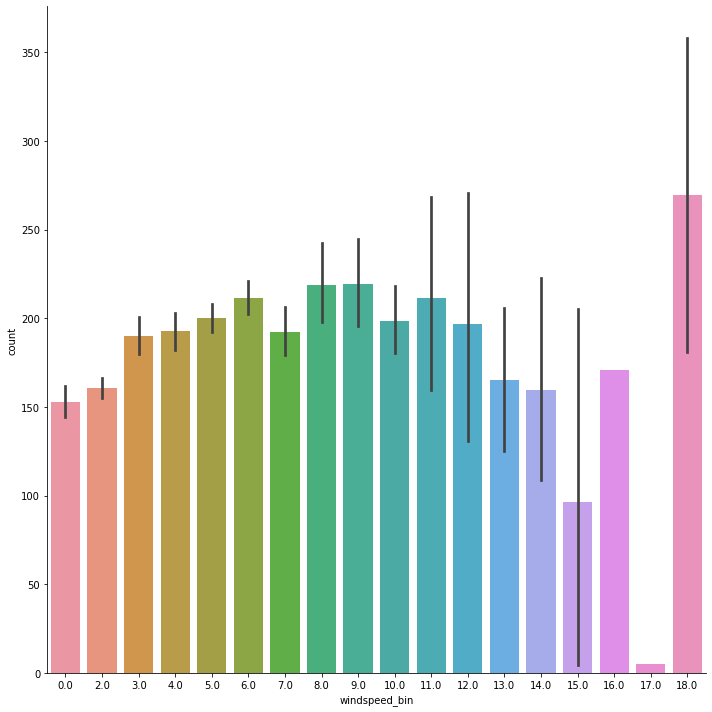

In [14]:
new_df=train.copy()
new_df['windspeed_bin']=np.floor(new_df['windspeed'])//3
sns.factorplot(x='windspeed_bin',y='count',data=new_df,kind='bar',size=10)

In [15]:
for df in (train,test):
    
    df['wind_categori'] = np.nan
    df.loc[df.windspeed < 15, 'wind_categori'] = 'normal'
    df.loc[(df.windspeed >= 50), 'wind_categori'] = 'high'

In [16]:
weather_train = pd.get_dummies(train['weather'], prefix='wea', prefix_sep='_')
weather_test = pd.get_dummies(test['weather'], prefix='wea', prefix_sep='_')

season_train = pd.get_dummies(train['season'], prefix='sea', prefix_sep='_')
season_test = pd.get_dummies(test['season'], prefix='sea', prefix_sep='_')

year_train = pd.get_dummies(train['year'], prefix='year', prefix_sep='_')
year_test = pd.get_dummies(test['year'], prefix='year', prefix_sep='_')

wind_categori_train = pd.get_dummies(train['wind_categori'], prefix='wind_cate', prefix_sep='_')
wind_categori_test = pd.get_dummies(test['wind_categori'], prefix='wind_cate', prefix_sep='_')

humi_categori_train = pd.get_dummies(train['humi_categori'], prefix='humi_cate', prefix_sep='_')
humi_categori_test = pd.get_dummies(test['humi_categori'], prefix='humi_cate', prefix_sep='_')

hr_categori_train = pd.get_dummies(train['hr_categori'], prefix='hr_cate', prefix_sep='_')
hr_categori_test = pd.get_dummies(test['hr_categori'], prefix='hr_cate', prefix_sep='_')

In [17]:
Train_Master = pd.concat([train,
                          weather_train,
                          season_train,
                          year_train,
                          wind_categori_train,
                          humi_categori_train,
                          hr_categori_train
                         ], axis=1)

In [18]:
Test_Master = pd.concat([test,
                          weather_test,
                          season_test,
                          year_test,
                          wind_categori_test,
                          humi_categori_test,
                          hr_categori_test
                         ], axis=1)

In [19]:
Train_Master.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hr',
       'hr_categori', 'humi_categori', 'wind_categori', 'wea_1', 'wea_2',
       'wea_3', 'wea_4', 'sea_1', 'sea_2', 'sea_3', 'sea_4', 'year_2011',
       'year_2012', 'wind_cate_high', 'wind_cate_normal', 'humi_cate_high',
       'humi_cate_low', 'humi_cate_normal', 'hr_cate_day', 'hr_cate_night',
       'hr_cate_rush'],
      dtype='object')

In [20]:
Train_Master[['wind_cate_high', 'wind_cate_normal','wind_categori']]
#Train_Master.loc[Train_Master.wind_categori=NaN,:]

,wind_cate_high,wind_cate_normal,wind_categori
0,0,1,normal
1,0,1,normal
2,0,1,normal
3,0,1,normal
4,0,1,normal
...,...,...,...
10881,0,0,NaN
10882,0,0,NaN
10883,0,0,NaN
10884,0,1,normal


In [21]:
Train_Master.loc[Train_Master['wind_categori']=='high',['wind_cate_high', 'wind_cate_normal','wind_categori']]

,wind_cate_high,wind_cate_normal,wind_categori
760,1,0,high
868,1,0,high
2755,1,0,high
2756,1,0,high


In [22]:
Train_Master = Train_Master.drop(['weather','season','year','datetime','hr_categori','humi_categori','wind_categori'], axis = 1)
Test_Master = Test_Master.drop(['weather','season','year','datetime','hr_categori','humi_categori','wind_categori'], axis = 1)

Train, Test = train_test_split(Train_Master, test_size = 0.3)

count    1.028344
dtype: float64

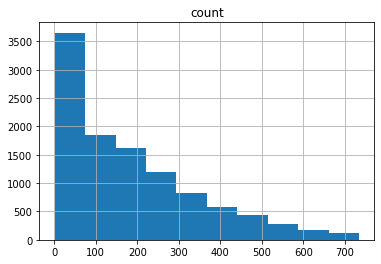

In [23]:
Train_Master[['count']].hist()
Train_Master[['count']].skew()

In [24]:
X_train = Train.drop(['count'], axis=1)
Y_train = Train['count']
Y_train_log = Train['count'].apply(lambda x:np.log1p(x))

X_test = Test.drop(['count'], axis=1)
Y_test = Test["count"]
Y_test_log = Test["count"].apply(lambda x:np.log1p(x))

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

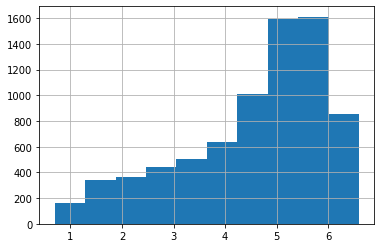

In [25]:
Y_train_log.hist() #可以看出Skewness > 0 的数据，正偏差数值较大，为正偏或右偏。长尾巴拖在右边，数据右端有较多的极端值，对数修正后正态 


In [26]:
def lasso_autotune(X,y):
	
	param_test = {
	 'max_iter':[5000],
	 'alpha':[1e-10, 1e-8, 1e-4,1e-2, 1, 5, 10, 100, 500, 1000]
	}

	gsearch = GridSearchCV(Lasso(fit_intercept=True, normalize=True, selection='random'),refit=True,
	                        param_grid = param_test, scoring='neg_mean_squared_error',iid=True, cv=5)
	gsearch.fit(X,y)
	print('____________________________________________')
	print('tune lasso')
	print('____________________________________________')
	print(gsearch.cv_results_)
	print(gsearch.best_params_)
	print(gsearch.best_score_)
	print(rmsle(gsearch.predict(X),y))

	return gsearch.best_estimator_

In [27]:
def ridge_autotune(X,y):
	
	param_test = {
	 'max_iter':[5000],        
	 'alpha':[1e-10, 1e-8, 1e-4,1e-2, 1, 5, 10, 100],
	 'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  #lsqr数据量不是很大最快
	}

	gsearch = GridSearchCV(Ridge(),refit=True,
	                        param_grid = param_test, scoring='neg_mean_squared_error',iid=True, cv=5)
	gsearch.fit(X,y)
	print('____________________________________________')
	print('tune ridge')
	print('____________________________________________')
	print(gsearch.cv_results_)
	print(gsearch.best_params_)
	print(gsearch.best_score_)
	print(rmsle(gsearch.predict(X),y))

	return gsearch.best_estimator_

In [28]:
def svr_autotune(X,y):

	param_test = {
	 'kernel':['rbf','linear','sigmoid'],
	 'gamma':np.logspace(-7, 2, 3),
	 'epsilon':[0.1,0.3,0.5],
	 'C':np.logspace(-2, 7, 3),
	}

	gsearch = GridSearchCV(SVR(),refit=True,
	                        param_grid = param_test, scoring='neg_mean_squared_error',iid=True, cv=5)
	gsearch.fit(X,y)
	print('____________________________________________')
	print('tune svr')
	print('____________________________________________')
	print(gsearch.cv_results_)
	print(gsearch.best_params_)
	print(gsearch.best_score_)
	print(rmsle(gsearch.predict(X),y))

	return gsearch.best_estimator_

In [29]:
def random_forest_autotune(X,y):

	param_test = {
	 'max_depth':[9,13,17],
	 'max_features':['auto','sqrt'],
	 'n_estimators': [500,1000,1500]
	}

	gsearch = GridSearchCV(RandomForestRegressor(),refit=True,
	                        param_grid = param_test, scoring='neg_mean_squared_error',iid=True, cv=5)
	gsearch.fit(X,y)
	print('____________________________________________')
	print('tune random forest')
	print('____________________________________________')
	print(gsearch.cv_results_)
	print(gsearch.best_params_)
	print(gsearch.best_score_)
	print(rmsle(gsearch.predict(X),y))

	return gsearch.best_estimator_

In [30]:
def xgb_autotune(X,y):
	param = {
	        'objective':'reg:linear',
	        'n_estimators':1000,
	        'learning_rate':0.05,
	        'gamma':0,
	        'max_depth':5,
	        'min_child_weight':1,
	        'colsample_bytree':0.5,
	        'subsample': 0.8, 
	        'verbose':1,
	        'reg_alpha':0}


	param_test1 = {
	 'max_depth':[7,13,15],
	 'reg_alpha':[0.1,1,10,100],
	 'learning_rate':[0.05,0.1],
	}

	gsearch = GridSearchCV(xgb.XGBRegressor(objective=param['objective'],
	                          n_estimators=param['n_estimators'], learning_rate = param['learning_rate'], gamma=param['gamma'],
	                          colsample_bytree=param['colsample_bytree'], subsample=param['subsample'], reg_alpha=param['reg_alpha']
	                          ),
	                        param_grid = param_test1, scoring='neg_mean_squared_error',iid=False, cv=5)
	gsearch.fit(X,y)
	print('____________________________________________')
	print('tune max_depth, min_child_weight')
	print('____________________________________________')
	print(gsearch.cv_results_)
	print(gsearch.best_params_)
	print(gsearch.best_score_)
	print(rmsle(gsearch.predict(X),y))
	return gsearch.best_estimator_
    

In [33]:
#lasso_param = lasso_autotune(X_train,Y_train_log)
#ridge_param = ridge_autotune(X_train,Y_train_log)
xgb_param = xgb_autotune(X_train,Y_train_log)
#random_forest_param = random_forest_autotune(X_train,Y_train_log)
# svr_param = svr_autotune(X_train,Y_train_log)


D:\Users\Surface\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:58:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Users\Surface\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:59:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Users\Surface\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:59:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Users\Surface\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:59:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Users\Surface\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:59:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\Users\Surface\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:00:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 